In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# using"tanh Activation" and Input Layer
classifier.add(Dense(units=16,activation='tanh'))

In [ ]:
# Adding the  hidden layer and Adding Dropout Layer to avoiod Overfitting(Regularization(L1&L2 Norms)) using"tanh"


classifier.add(Dense(units=64, activation='tanh'))
classifier.add(Dropout(rate=0.25))


In [ ]:
# Adding  the second hidden layer and Adding Dropout Layer To avoid Overfitting(Regularization(L1&L2 Norms )) using "Tanh " as given in instructions and 
#using two hidden layer as given in instructions
classifier.add(Dense(units=32, activation='tanh'))
classifier.add(Dropout(rate=0.25))

In [ ]:
# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Using "mse" Loss Function and using Adam Optimizer(Mommentum+Rmsprop)
classifier.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [ ]:
import tensorflow
#tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
#Early Stopping
import tensorflow as tf

Early_Stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=50,callbacks=Early_Stopping)

Epoch 1/50
1675/1675 [==============================] - 18s 9ms/step - loss: 0.1961 - accuracy: 0.8094 - val_loss: 0.1782 - val_accuracy: 0.8084
Epoch 2/50
1675/1675 [==============================] - 14s 8ms/step - loss: 0.1392 - accuracy: 0.8654 - val_loss: 0.1297 - val_accuracy: 0.8616
Epoch 3/50
1675/1675 [==============================] - 13s 8ms/step - loss: 0.1037 - accuracy: 0.8926 - val_loss: 0.1113 - val_accuracy: 0.8712
Epoch 4/50
1675/1675 [==============================] - 14s 8ms/step - loss: 0.0794 - accuracy: 0.9168 - val_loss: 0.1046 - val_accuracy: 0.8715
Epoch 5/50
1675/1675 [==============================] - 13s 8ms/step - loss: 0.0660 - accuracy: 0.9287 - val_loss: 0.1203 - val_accuracy: 0.8504
Epoch 6/50
1675/1675 [==============================] - 12s 7ms/step - loss: 0.0573 - accuracy: 0.9378 - val_loss: 0.1063 - val_accuracy: 0.8727
Epoch 7/50
1675/1675 [==============================] - 13s 8ms/step - loss: 0.0491 - accuracy: 0.9470 - val_loss: 0.1061 - val_ac

In [ ]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

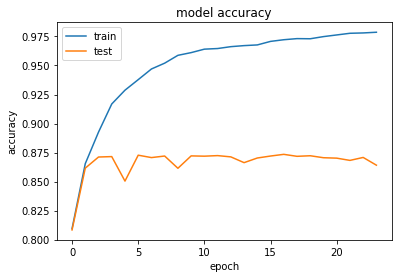

In [ ]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

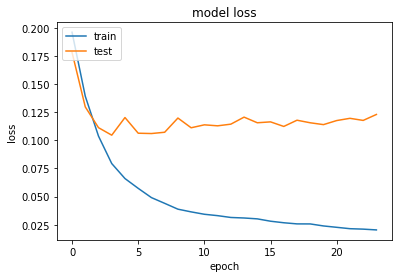

In [ ]:
 #summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()